In [28]:
import sys
!{sys.executable} -m pip install opencv-python
import cv2
!{sys.executable} -m pip install matplotlib
from matplotlib import pyplot as plt
!{sys.executable} -m pip install numpy
import numpy as np  
from math import atan2, cos, sin, sqrt, pi
from glob import glob
import os

In [29]:
filepaths = glob("sample/*.png", recursive=True)
print(filepaths[:10])

['sample/acumed ex5 at 10.25.26 AM.png', 'sample/synthes va ex3 at 4.31.53 AM (1).png', 'sample/Acumed ex2 at 9.50.35 AM.png', 'sample/acumed ex5 at 10.25.02 AM (1).png', 'sample/synthes va ex1-8.png', 'sample/synthes va ex2 at 4.18.08 AM (1).png', 'sample/Acumed ex2 at 9.50.42 AM.png', 'sample/acumed ex5 at 10.25.20 AM.png', 'sample/Acumed ex2 at 9.50.59 AM.png', 'sample/synthes va ex2 at 4.18.04 AM.png']


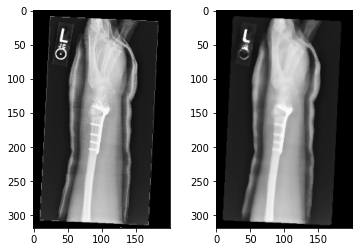

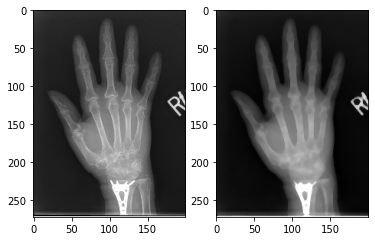

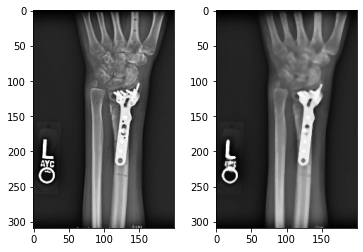

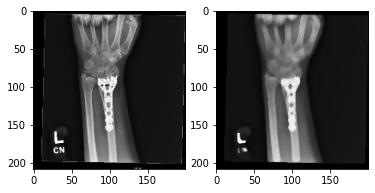

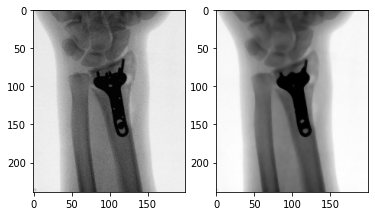

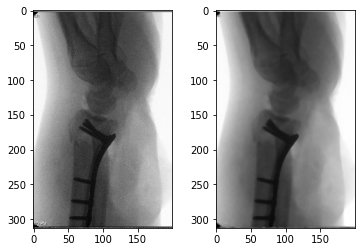

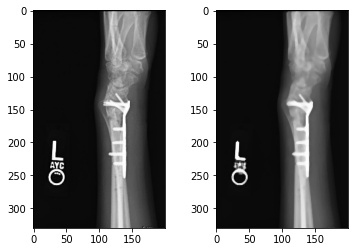

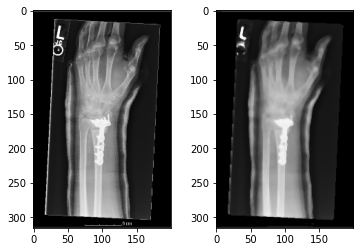

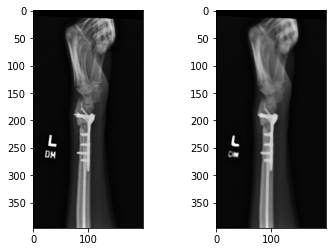

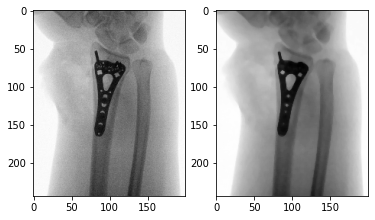

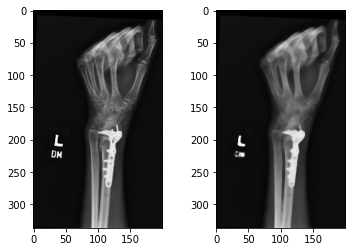

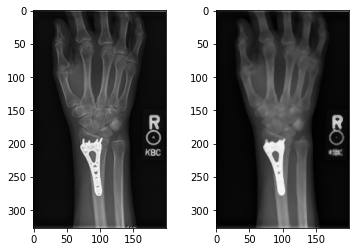

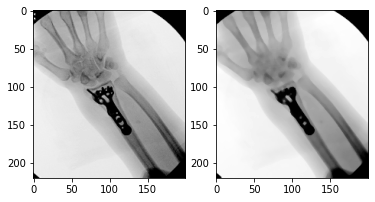

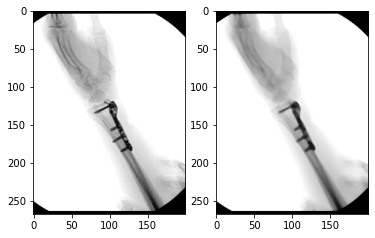

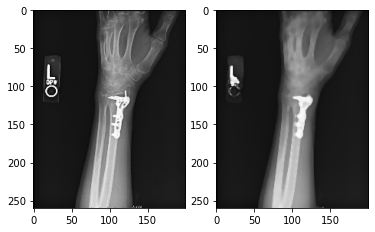

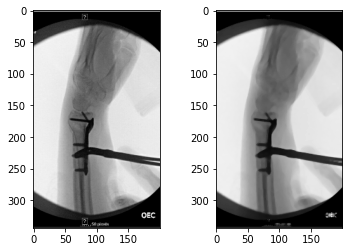

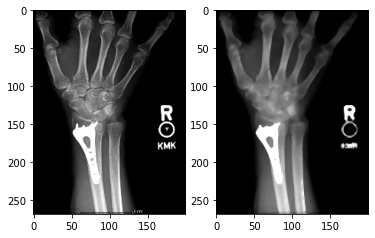

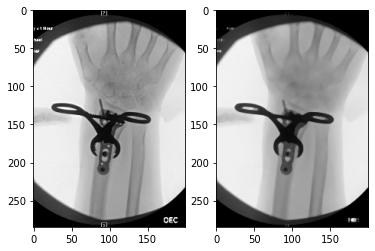

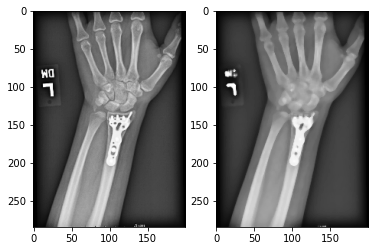

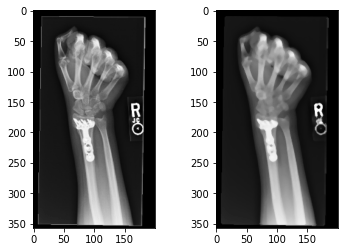

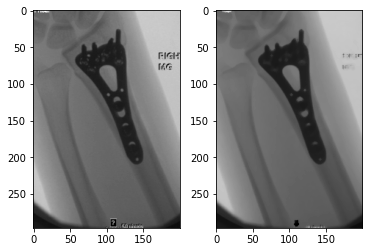

In [30]:
images = {}
grayScale = {}
blurs = {}

for filepath in filepaths:
    image = cv2.imread(filepath)
    dim = (200, np.floor(image.shape[0] / image.shape[1] * 200 ).astype(int))
    image = cv2.resize(image, dim)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)
    images[filepath] = image
    grayScale[filepath] = gray
    blurs[filepath] = blur
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(gray, cmap='gray')
    f.add_subplot(1,2, 2)
    plt.imshow(blur, cmap='gray')
    plt.show(block=True)

In [31]:
import matplotlib.pyplot as plt

Processing: sample/acumed ex5 at 10.25.26 AM.png


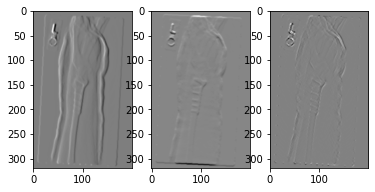

Processing: sample/synthes va ex3 at 4.31.53 AM (1).png


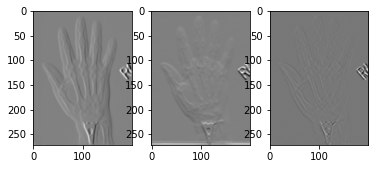

Processing: sample/Acumed ex2 at 9.50.35 AM.png


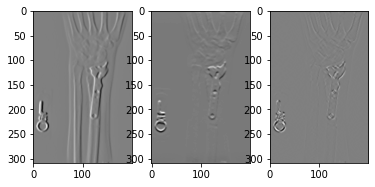

Processing: sample/acumed ex5 at 10.25.02 AM (1).png


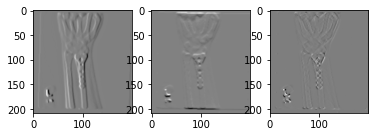

Processing: sample/synthes va ex1-8.png


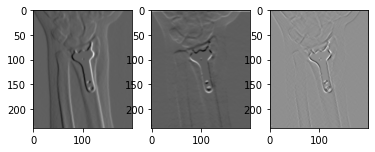

Processing: sample/synthes va ex2 at 4.18.08 AM (1).png


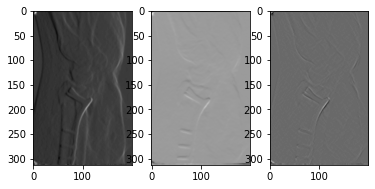

Processing: sample/Acumed ex2 at 9.50.42 AM.png


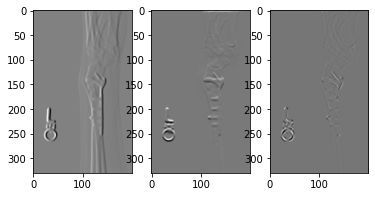

Processing: sample/acumed ex5 at 10.25.20 AM.png


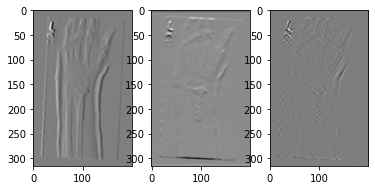

Processing: sample/Acumed ex2 at 9.50.59 AM.png


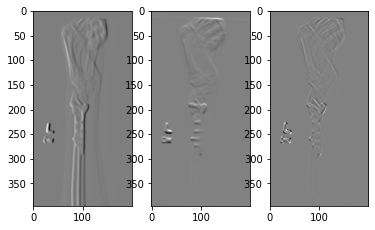

Processing: sample/synthes va ex2 at 4.18.04 AM.png


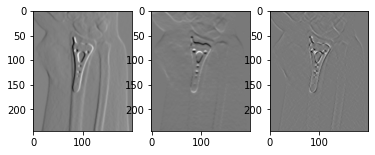

Processing: sample/Acumed ex2 at 9.51.06 AM.png


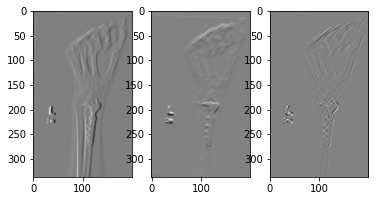

Processing: sample/synthes va ex5 at 10.56.24 AM (1).png


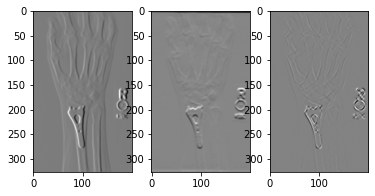

Processing: sample/acumed ex1 at 2.22.36 PM (1).png


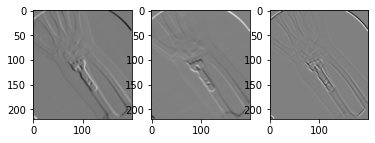

Processing: sample/synthes va ex5 at 2.22.45 PM.png


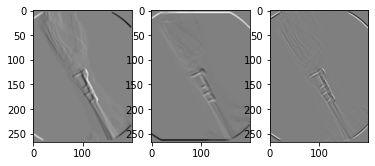

Processing: sample/acumed ex3 at 9.58.37 AM.png


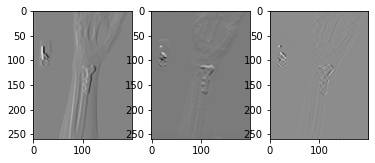

Processing: sample/acumed ex3 at 2.19.58 PM.png


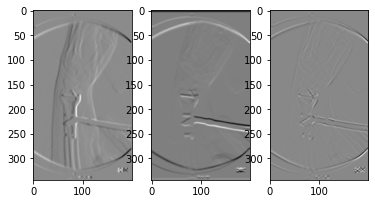

Processing: sample/synthes va ex5 at 10.57.20 AM (1).png


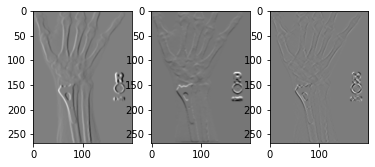

Processing: sample/acumed ex3 at 2.20.05 PM.png


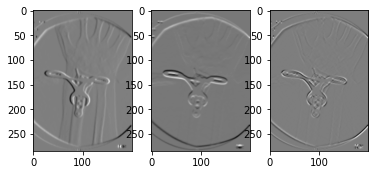

Processing: sample/acumed ex1 at 9.47.15 AM.png


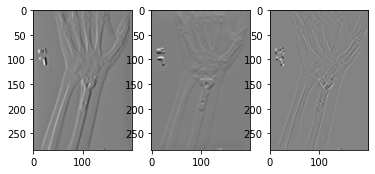

Processing: sample/acumed ex5 at 10.13.43 AM (1).png


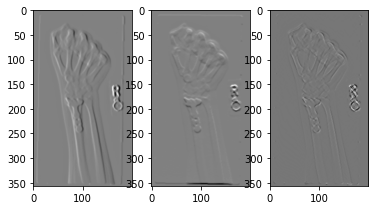

Processing: sample/synthes va ex5 at 2.29.45 PM (1).png


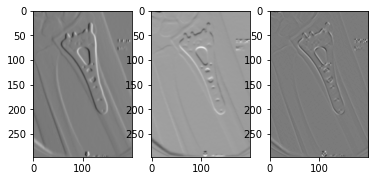

In [32]:
sobel = {}


%matplotlib inline
## Sobel Edge Detection
for filepath, image in blurs.items():
    print("Processing:", filepath)
    sobelx = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axix
    sobely = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
    # Display Sobel Edge Detection Images
    # cv2.imshow('Sobel X', sobelx)
    # cv2.imshow('Sobel Y', sobely)
    # cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
    # f = plt.figure()
    # f.add_subplot(1,2, 1)
    # plt.imshow(sobelx, cmap='gray')
    # f.add_subplot(1,2, 2)
    # plt.imshow(sobely, cmap='gray')
    # f.add_subplot(1,2, 3)
    # plt.imshow(sobelxy, cmap='gray')
    sobel[filepath] = sobelx
    f, axarr = plt.subplots(1,3)
    axarr[0].imshow(sobelx, cmap='gray')
    axarr[1].imshow(sobely, cmap='gray')
    axarr[2].imshow(sobelxy, cmap='gray')



    plt.show(block=True)
    
    


Processing: sample/acumed ex5 at 10.25.26 AM.png


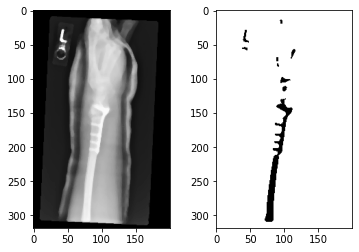

Processing: sample/synthes va ex3 at 4.31.53 AM (1).png


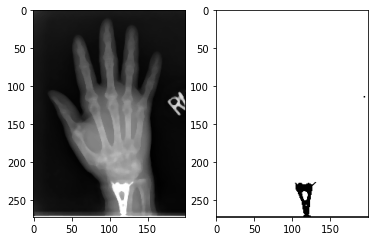

Processing: sample/Acumed ex2 at 9.50.35 AM.png


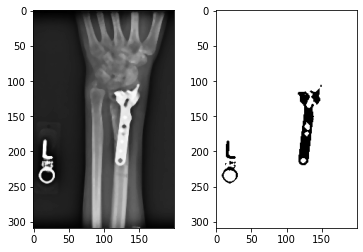

Processing: sample/acumed ex5 at 10.25.02 AM (1).png


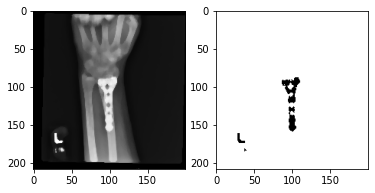

Processing: sample/synthes va ex1-8.png


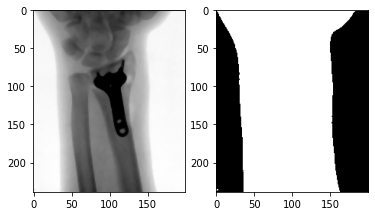

Processing: sample/synthes va ex2 at 4.18.08 AM (1).png


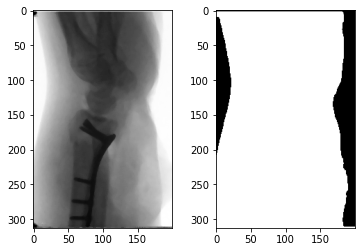

Processing: sample/Acumed ex2 at 9.50.42 AM.png


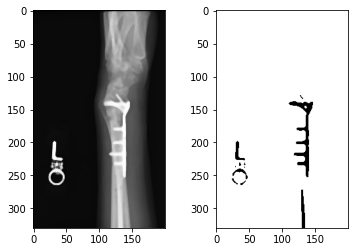

Processing: sample/acumed ex5 at 10.25.20 AM.png


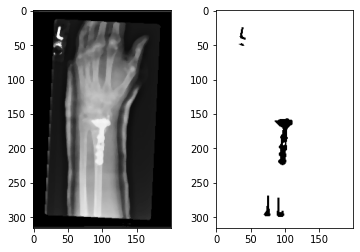

Processing: sample/Acumed ex2 at 9.50.59 AM.png


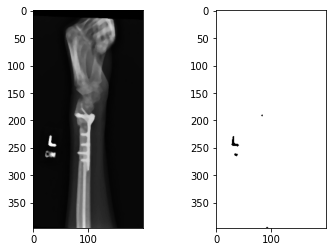

Processing: sample/synthes va ex2 at 4.18.04 AM.png


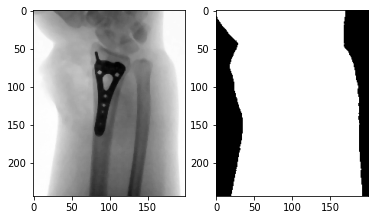

Processing: sample/Acumed ex2 at 9.51.06 AM.png


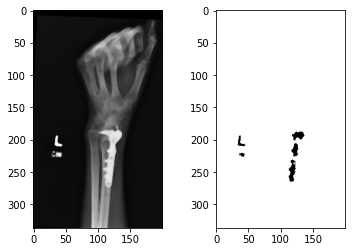

Processing: sample/synthes va ex5 at 10.56.24 AM (1).png


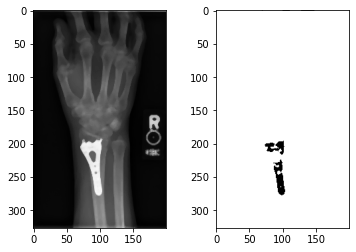

Processing: sample/acumed ex1 at 2.22.36 PM (1).png


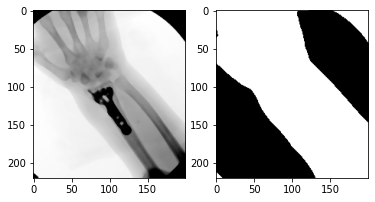

Processing: sample/synthes va ex5 at 2.22.45 PM.png


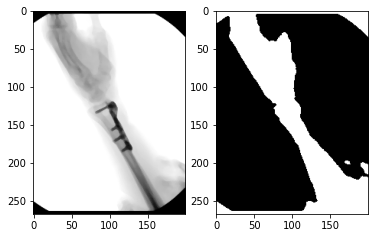

Processing: sample/acumed ex3 at 9.58.37 AM.png


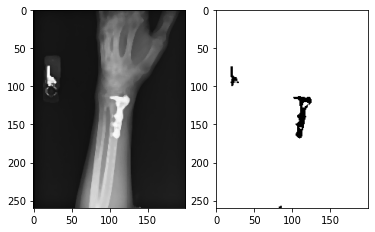

Processing: sample/acumed ex3 at 2.19.58 PM.png


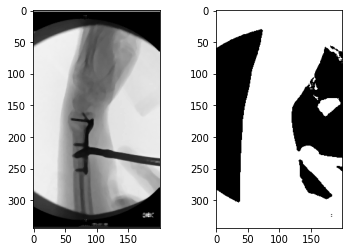

Processing: sample/synthes va ex5 at 10.57.20 AM (1).png


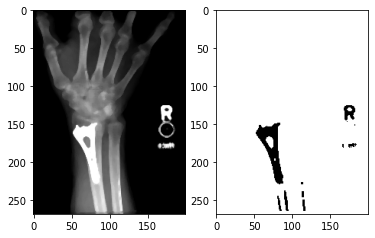

Processing: sample/acumed ex3 at 2.20.05 PM.png


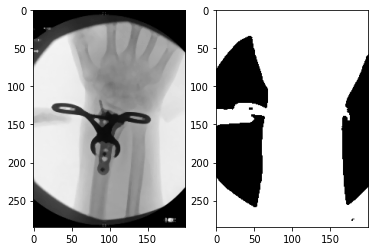

Processing: sample/acumed ex1 at 9.47.15 AM.png


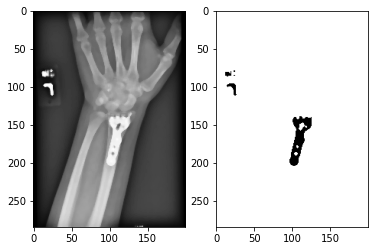

Processing: sample/acumed ex5 at 10.13.43 AM (1).png


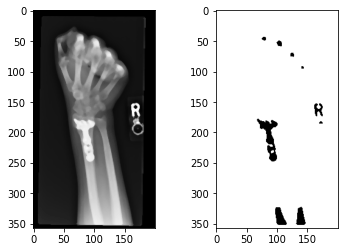

Processing: sample/synthes va ex5 at 2.29.45 PM (1).png


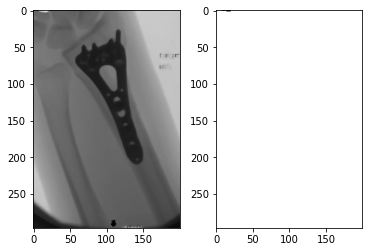

In [35]:
threshold = {}


%matplotlib inline
## Sobel Edge Detection
for filepath, image in blurs.items():
    print("Processing:", filepath)
    
    (T, threshInv) = cv2.threshold(image, 220, 255, cv2.THRESH_BINARY_INV)
    (T, thresh) = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY)
    combined = cv2.addWeighted(threshInv, 0.5, threshInv, 0.5, 0)
    
    #show
    f = plt.figure()
    
    f.add_subplot(1,2, 1)
    plt.imshow(image, cmap='gray')
    f.add_subplot(1,2, 2)
    plt.imshow(combined, cmap='gray')
    plt.show()






    # sobel[filepath] = sobelx
    # f, axarr = plt.subplots(1,3)
    # axarr[0].imshow(sobelx, cmap='gray')
    # axarr[1].imshow(sobely, cmap='gray')
    # axarr[2].imshow(sobelxy, cmap='gray')



    # plt.show(block=True)
    
    
